In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [2]:
plt.style.use("seaborn")
#loading the data 
df = pd.read_csv(r"EOD-MCD (1).csv")

In [3]:
print(df.head())

         Date     Open    High      Low   Close     Volume  Dividend  Split  \
0  2017-12-28  173.260  173.55  172.620  173.10  1800068.0       0.0    1.0   
1  2017-12-27  171.330  172.74  170.845  172.67  1596817.0       0.0    1.0   
2  2017-12-26  171.090  171.64  170.820  171.29  1280227.0       0.0    1.0   
3  2017-12-22  171.375  172.04  170.550  171.42  3234143.0       0.0    1.0   
4  2017-12-21  172.680  172.75  171.670  171.85  2341676.0       0.0    1.0   

     Adj_Open    Adj_High     Adj_Low   Adj_Close  Adj_Volume  
0  161.897781  162.168763  161.299752  161.748274   1800068.0  
1  160.094349  161.411882  159.641154  161.346473   1596817.0  
2  159.870088  160.384019  159.617794  160.056972   1280227.0  
3  160.136398  160.757788  159.365500  160.178447   3234143.0  
4  161.355817  161.421226  160.412052  160.580248   2341676.0  


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.0,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,114.703959,115.409605,114.078441,114.762578,5.202166e+06,0.013734,1.0,101.266148,101.888739,100.714383,101.318265,5.202166e+06
std,22.505638,22.596884,22.418832,22.523906,2.603023e+06,0.109392,0.0,23.749267,23.855102,23.651463,23.767304,2.603023e+06
min,88.070000,89.820000,87.500000,88.460000,9.632330e+05,0.000000,1.0,75.254904,76.476285,74.870383,75.588155,9.632330e+05
25%,96.270000,96.955000,95.810000,96.290000,3.542037e+06,0.000000,1.0,80.998535,81.666781,80.424115,81.130713,3.542037e+06
50%,111.495000,112.155000,110.670000,111.155000,4.582361e+06,0.000000,1.0,98.028850,98.620864,97.173717,98.313894,4.582361e+06
75%,124.087500,124.747500,123.377500,124.052500,6.217050e+06,0.000000,1.0,112.030999,112.807727,111.648037,112.080686,6.217050e+06
max,174.990000,175.780000,174.110000,174.200000,2.525932e+07,1.010000,1.0,163.514329,164.252522,162.692039,162.776137,2.525932e+07


In [5]:
x = df[['High', 'Low','Open','Volume']].values
y = df['Close'].values

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [7]:
regressor =  LinearRegression()

In [8]:
regressor.fit(x_train,y_train)

LinearRegression()

In [9]:
print(regressor.coef_)

[ 7.80844672e-01  7.70665118e-01 -5.50934236e-01  2.24627761e-10]


In [10]:
print(regressor.intercept_)

-0.08527545822920501


In [11]:
predict = regressor.predict(x_test)

In [12]:
print(predict)

[112.27344219 125.10676288  92.95616698 111.91547183 119.06437121
 159.4722399  166.61314719  98.47865202 124.1614646  113.66216701
  98.47227364 101.30617716 119.72040188  94.54144917  97.42473016
  97.58295378 157.19572997 113.24600511 119.08773682 156.58090465
 111.93273418 127.69582762 100.39428588  97.9756954  118.04109127
 119.81093508  96.84276916  96.67211873 114.16806786  94.569577
  96.99946481 129.9985019   95.56837771  93.10252203  94.86398132
  99.04736673 167.11648204 112.55901867  97.00110947  96.09458831
 114.63853132 122.16615957  96.08018122  94.79174136 118.15385387
  94.84731726  96.81235097  96.20563174 119.14840744  96.65628253
 101.97576947 119.02348405 118.10622837 116.94088336 127.09973622
  93.41067318  93.38172562  96.41767979 157.04354726 122.72881081
 116.49120053  98.28029652 172.65685532 116.73369954  91.19270627
 117.05879263  98.57074666  95.98027483 124.38719197  98.69785473
 151.45275743 103.17078655 118.72818073  95.46388634  97.25964662
 171.2476621

In [13]:
dframe = pd.DataFrame({"Actual" : y_test.flatten() , 'Predicted' : predict.flatten()})

In [14]:
dframe.head(25)

,Actual,Predicted
0,112.62,112.273442
1,124.67,125.106763
2,92.81,92.956167
3,112.11,111.915472
4,119.20,119.064371
5,159.67,159.472240
6,166.72,166.613147
7,98.74,98.478652
8,123.95,124.161465
9,113.45,113.662167


In [15]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,predict))
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,predict))
print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(y_test,predict)))

Mean Absolute Error :  0.2903453980753727
Mean Squared Error :  0.14906688342239854
Root Mean Squared Error :  0.3860918069868856


In [16]:
graph = dframe.head(20)

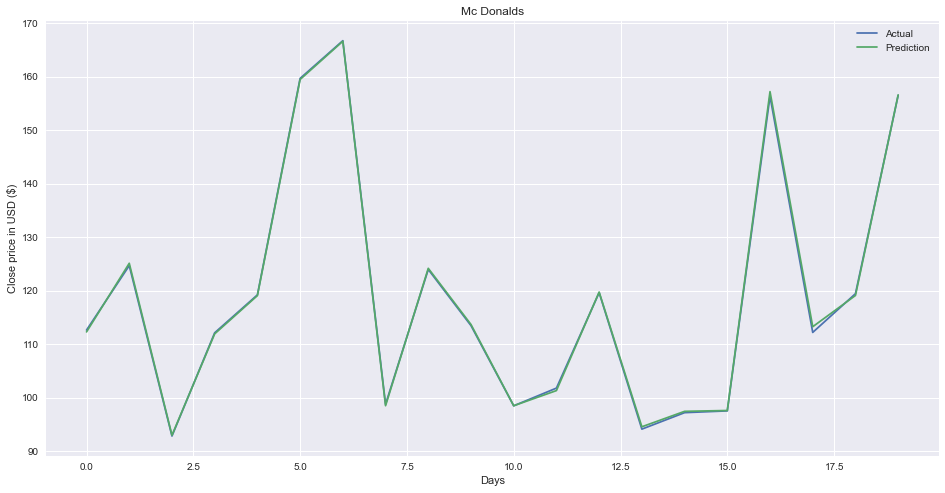

In [17]:
#visualising the dataset
plt.figure(figsize=(16,8))
plt.title("Mc Donalds")
plt.xlabel('Days')
plt.ylabel('Close price in USD ($)')
plt.plot( graph)
plt.legend(['Actual','Prediction'])
plt.show()

In [18]:
sns.help()

AttributeError: module 'seaborn' has no attribute 'help'